# Statistics and Data Visualization

Before you build any kind of models, you **must** know what your data looks like. Otherwise it would be like building a lego castle blind. You have all the pieces but won't know what you are using to build it. There are two main ways in which you go about understanding your data:
1. Descriptive Statistics: get a general sense of your data in a few numbers to see how useful the collection of data will be.
2. Data Visualization: identify patterns or outliers that may explain how your data behaves in the model.
    
Both of these elements make up what is called exploratory analysis. 

In [39]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
#Prepare the Data
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

#We would like to look at the data, and how it can help predict the target
data = pd.DataFrame(data,columns=feature_names)
target = pd.DataFrame(target,columns=['Target'])

iris_data = data.join(target)
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Super quick review of statistics:
### Mean, median, mode
The **mean** is the arithmetic average of a group of values (total / number of values)

The **median** is the middle value in a group of values (order values from largest to smallest and locate the value in the middle)

The **mode** is the value that occurs most frequently in the group of values


In [10]:
print("Shape of the data (rows,columns):",iris_data.shape)
print("Mean of each column:",iris_data.mean(axis=0)) #must pass in an axis argument, otherwise will compute mean of entire matrix
print("Median of each column:",np.median(iris_data,axis=0))
print("Mode of each column:",stats.mode(iris_data)) #implied axis=0 for this function

Shape of the data (rows,columns): (150, 5)
Mean of each column: sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
Target               1.000000
dtype: float64
Median of each column: [5.8  3.   4.35 1.3  1.  ]
Mode of each column: ModeResult(mode=array([[5. , 3. , 1.4, 0.2, 0. ]]), count=array([[10, 26, 13, 29, 50]]))


### Variance and Standard Deviation
It is used to get a sense of how the values are distributed, aka spread around the average value in the dataset. 

**Variance** of a set of values, **$\sigma^2$**, is the average of the square of the difference of the values from the mean of the dataset:

\begin{align}
\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}\
\end{align}

We square the difference to preserve the magnitude of difference and so they don't cancel each other out when you add them.

The **standard deviation** is the square root of the variance and measures spread on the same scale as the values. 

\begin{align}
\sigma = \sqrt\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}\
\end{align}

In [14]:
print("Variance of each column:\n",iris_data.var(axis=0))
print("\nStandard deviation of each column:\n",iris_data.std(axis=0))

Variance of each column:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
Target               0.671141
dtype: float64

Standard deviation of each column:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
Target               0.819232
dtype: float64


### Covariance and Correlation
These are used to quantify how two collections of data vary with each other. 

**Covariance** is the measure of spread, like variance, but also how closely two datasets track each other. It tells the nature of their relationship, whether they increase or decrease together or don't track each other at all. It is the squared quantity of the magnitude of spread.

\begin{align}
Cov(x,y) = \frac{\sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)} {n}\
\end{align}

To look at the variance of a dataset, we compute the **covariance matrix**. It tells us the pairwise covariance between every pair of rows/columns in our dataset.

In [16]:
#have to take the transpose of iris_data, because np.cov computes row-based covariances
#so if we take the transpose, our columns become our rows!
iris_data_column_cov = np.cov(iris_data.T)
print("Original iris_data_final matrix shape:",iris_data.shape)
print("Columnar covariance matrix:\n",iris_data_column_cov,iris_data_column_cov.shape)

Original iris_data_final matrix shape: (150, 5)
Columnar covariance matrix:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069  0.53087248]
 [-0.042434    0.18997942 -0.32965638 -0.12163937 -0.15234899]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094   1.37248322]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626  0.59731544]
 [ 0.53087248 -0.15234899  1.37248322  0.59731544  0.67114094]] (5, 5)


#### Exercise Time!!
* Compute the row-based covariance matrix of `iris_data_final`. What does this matrix measure?

In [18]:
iris_data_row = np.cov(iris_data)
print(iris_data_row, iris_data_row.shape)

[[4.863  4.5275 4.4635 ... 3.2955 3.042  2.9445]
 [4.5275 4.24   4.1575 ... 3.25   2.9825 2.8975]
 [4.4635 4.1575 4.097  ... 3.0385 2.804  2.714 ]
 ...
 [3.2955 3.25   3.0385 ... 4.088  3.7495 3.7245]
 [3.042  2.9825 2.804  ... 3.7495 3.488  3.438 ]
 [2.9445 2.8975 2.714  ... 3.7245 3.438  3.423 ]] (150, 150)


**Correlation** is sort of like **standard deviation** generalized to pairs of datasets.

The **correlation** is really a **covariance** scaled by each dataset's **standard deviation**, so that it can only take on values from -1 to +1. This allows us to compare two pairs of variables and quickly tell if one pair of datasets is more related than an other (since both values are scaled to the same range!):

\begin{align}
r(x,y) = \frac{cov(x,y)} {\sigma_x\sigma_y}\
\end{align}

Or this:

\begin{align}
r(x,y) = \frac{\frac{\sum_{i=1}^{n}(x_i-\mu_x)(y_i-\mu_y)} {n}} {\sigma_x\sigma_y}\
\end{align}

A positive correlation indicates the sets of values change together (when one increases or decreases the other does the same). A negative correlation indicates that the variables change in opposite directions (when one increases the other decreases).

Just like the **covariance**, when we compute **correlations** for some dataset, we really compute a **correlation matrix** over all of the distinct sets of values in the dataset. The **correlation matrix** is symmetric, just like the **covariance matrix**:

In [20]:
#again, we have to take the transpose because otherwise we will get row-wise correlations.
iris_data_column_corr = np.corrcoef(iris_data.T)
print("Original iris_data_final matrix shape:",iris_data.shape)
print("Columnar covariance matrix:\n",iris_data_column_corr,iris_data_column_corr.shape)

Original iris_data_final matrix shape: (150, 5)
Columnar covariance matrix:
 [[ 1.         -0.11756978  0.87175378  0.81794113  0.78256123]
 [-0.11756978  1.         -0.4284401  -0.36612593 -0.42665756]
 [ 0.87175378 -0.4284401   1.          0.96286543  0.9490347 ]
 [ 0.81794113 -0.36612593  0.96286543  1.          0.95654733]
 [ 0.78256123 -0.42665756  0.9490347   0.95654733  1.        ]] (5, 5)


Lets take a look at the correlation matrix visually too:

The correlation matrix for the iris dataset:


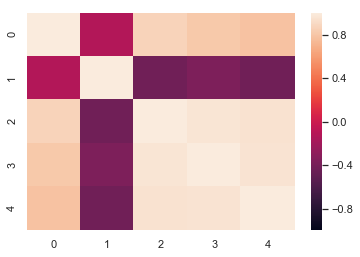

In [21]:
sns.heatmap(iris_data_column_corr,vmin=-1,vmax=1)
print("The correlation matrix for the iris dataset:")

## How do we make these pretty graphs?
Using `matplotlib` you can visualize your data in multiple ways. `seaborn` is based on `matplotlib` but the plots look much cleaner. Check out the documentation [here](http://seaborn.pydata.org/) for all the different plots you can make.

## 1. Histograms

A regular histogram is a very powerful, simple way to get a sense of the kinds of values a single set of data is comprised of. 

Let's take a look at the histogram of values for the first column in `iris_data`: 

Histogram of first column of the iris dataset:


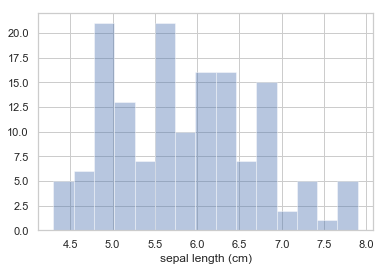

In [45]:
sns.distplot(iris_data.iloc[:,0],kde=False,bins=15,)
print("Histogram of first column of the iris dataset:")

The **x-axis shows us the actual range of values that the column takes on**. It looks like the first column ranges from just over 4 to just under 8.

The **y-axis is a frequency count of the number of rows in the column that fall into each vertical bin**. So, the first bin (furthest to the left), which ranges from ~4.25 to ~4.6 contains 5 values.

We can also plot groups of data using matplotlib method `hist`.

Text(0.5,1,'Histogram of sepal length grouped by flower type')

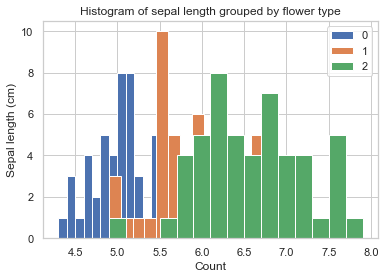

In [59]:
iris_group = iris_data['sepal length (cm)'].groupby(iris_data['Target'])
stackedHistogram = iris_group.hist(bins=15)
sns.mpl.pyplot.xlabel("Count")
sns.mpl.pyplot.ylabel("Sepal length (cm)")
sns.mpl.pyplot.legend(stackedHistogram.index)
sns.mpl.pyplot.title("Histogram of sepal length grouped by flower type")

We can also make **cumulative histograms**, which give us a graphical way to see what fraction of the datapoints are below or above a certain value:

Cumulative frequency histogram of 1st column:


/Users/Nicole/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


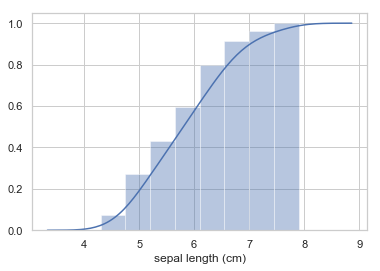

In [46]:
sns.distplot(iris_data.iloc[:,0], hist_kws={"cumulative":True},kde_kws={"cumulative":True})
print("Cumulative frequency histogram of 1st column:")

## 2. Scatter Plot

When you want to visualize how two columns vary together, you can use a **scatter plot**. 

A scatter plot simply plots the value for each column per-row for the two columns you've chosen.

Every dot in the scatter plot is an individual row. 

Let's generate the scatter plot for the petal columns in the iris dataset:

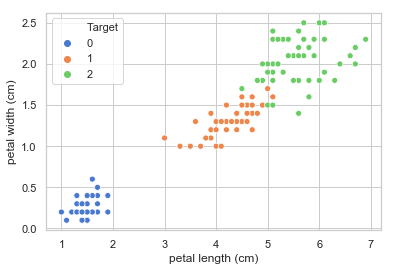

In [80]:
#Now, plot two vairables and group by flower type
sns.scatterplot(x=iris_data['petal length (cm)'], y=iris_data.loc[:,'petal width (cm)'],
                    hue=iris_data.loc[:,'Target'], palette=sns.color_palette("muted",n_colors=3))

You can combine both a **scatter plot** and a **histogram** for a pair of columns very effectively using a `jointplot`:

Scatter plot with histograms for the first two columns in the iris dataset:


/Users/Nicole/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


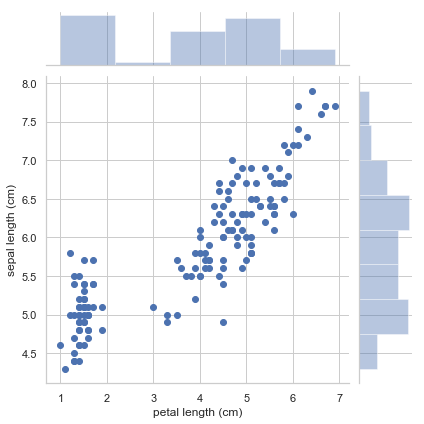

In [48]:
sns.jointplot(iris_data.iloc[:,2], iris_data.iloc[:,0],stat_func=None)
print("Scatter plot with histograms for the first two columns in the iris dataset:")

## 3. Relational Plotting

Relational Plotting in Seaborn returns a figure object that allows you to manipulate the data. This is contrasted against the ax object that is returned from other methods.

rel-plot = relational plot

Seaborn allows you to easily graph two (or more) variables against each other.
Here are a few examples.

Please feel free to play around with these data generating techniques!

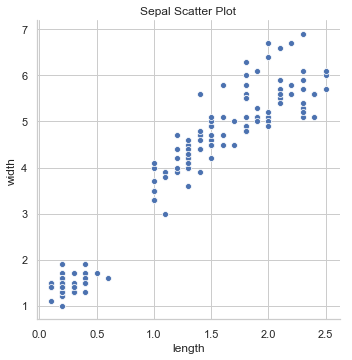

In [84]:
#Seaborn can create many types of graphs, such as a relational plot.
X = iris_data['petal width (cm)']
Y = iris_data['petal length (cm)']

sns.relplot(x="length",y="width",data=pd.DataFrame({'length':X,'width':Y})).set(title='Sepal Scatter Plot')

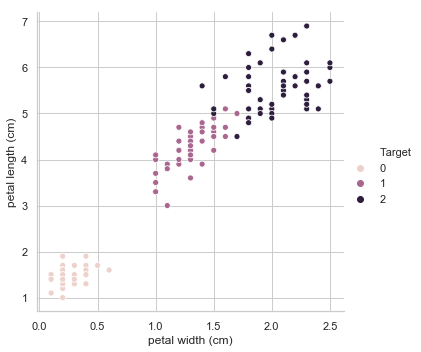

In [86]:
#Or to plot categories, and add details
sns.relplot(data=iris_data, x='petal width (cm)',y='petal length (cm)', hue='Target')

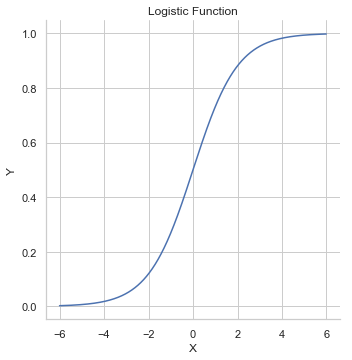

In [78]:
#Or for mathematical functions
X = np.arange(-6, 6, .01).tolist()
Y = list(map(lambda x: 1/(1+math.e**(x*-1)), X)) #f(x) = 1/(1+e**(-x))

sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),kind='line').set(title='Logistic Function')

## What if we are lazy and want to plot every possible combination?
This will give us the relplots of all the columns for the dataset.

/Users/Nicole/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Nicole/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/Nicole/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


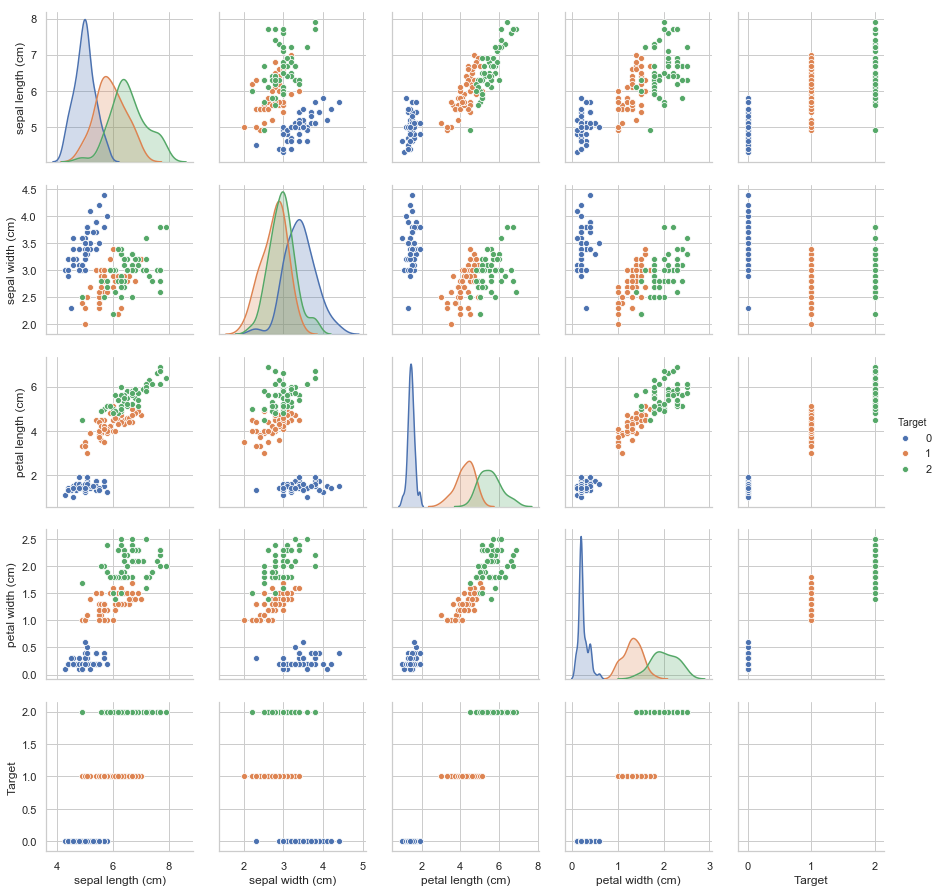

In [102]:
sns.pairplot(iris_data,hue='Target')

## 2) Categorical Plotting
Seaborn makes it easy to investigate by discrete binning

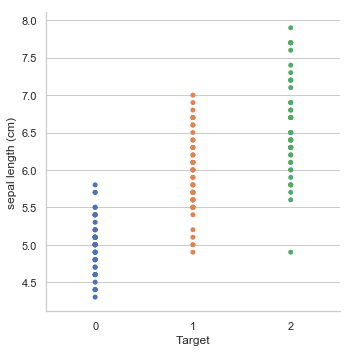

In [90]:
#Looking at the set of distributions we find:

sns.catplot(x='Target',y='sepal length (cm)', data=iris_data,jitter=False)

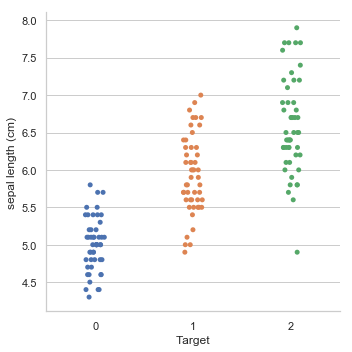

In [92]:
#Then, for a little more information on the distribution, you can spread the points apart

sns.catplot(x='Target',y='sepal length (cm)', data=iris_data,jitter=True)

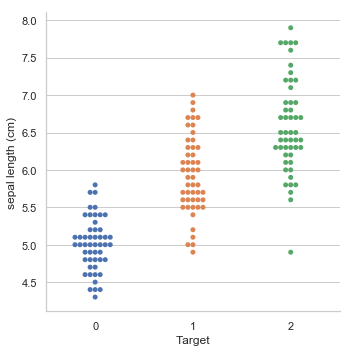

In [93]:
#Or, as an alternative

sns.catplot(x='Target',y='sepal length (cm)', data=iris_data,kind='swarm')

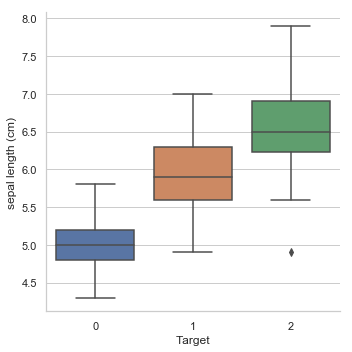

In [94]:
#You can also use functions to aggregate this information and make it a little easier to interpret
sns.catplot(x='Target',y='sepal length (cm)', data=iris_data,kind='box')

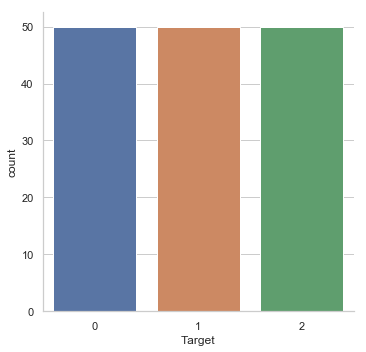

In [95]:
#Maybe also a view of our response sizes
sns.catplot(x='Target',data=pd.DataFrame(iris_data.loc[:,'Target']),kind='count')

## Finally we can combine the 4 plots using Matplotlib

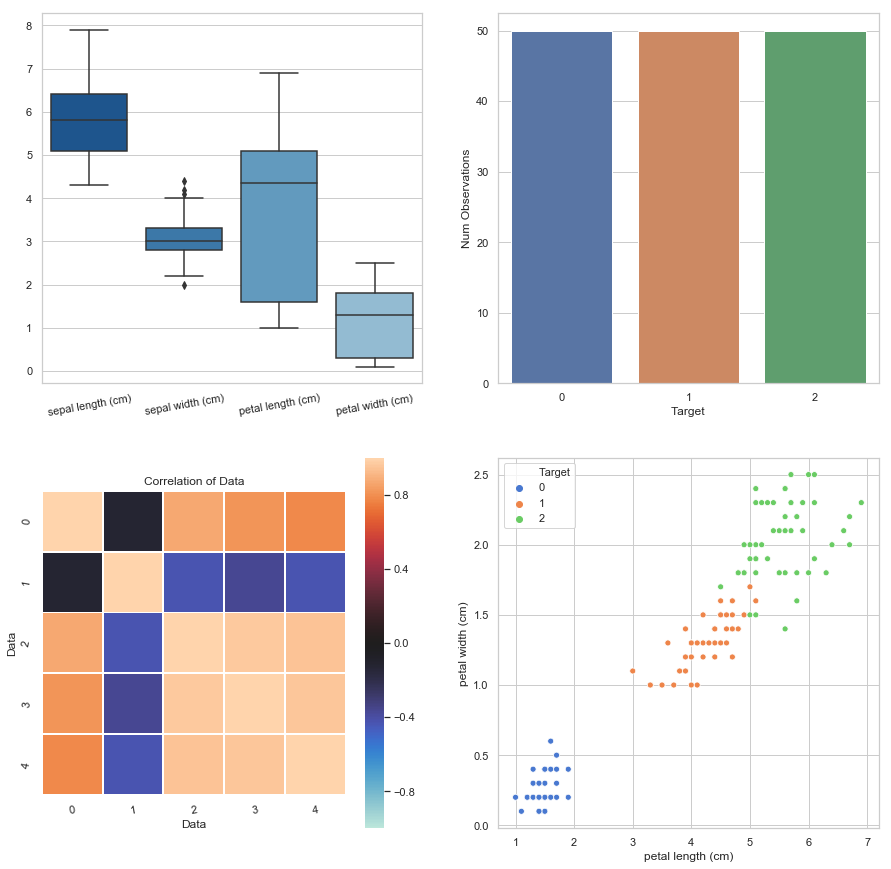

In [101]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))

sns.boxplot(data=data.iloc[:,:4], palette=sns.color_palette("Blues_r"),ax=axs[0,0])
plt.setp(axs[0,0].get_xticklabels(), rotation=10)

sns.countplot(x='Target',data=pd.DataFrame(full_data.loc[:,'Target']),ax=axs[0,1])
axs[0,1].set(ylabel='Num Observations')

sns.heatmap(iris_data_column_corr,vmin=-1,vmax=1, linewidths=1, ax=axs[1,0],
           center=0, square=True, color = sns.color_palette("PRGn", n_colors=7))

plt.setp(axs[1,0].get_xticklabels(), rotation=10)
plt.setp(axs[1,0].get_yticklabels(), rotation=80)
axs[1,0].set(xlabel='Data', ylabel='Data', title='Correlation of Data')

sns.scatterplot(x=full_data.loc[:,'petal length (cm)'], y=full_data.loc[:,'petal width (cm)'], ax=axs[1,1],
                    hue=full_data.loc[:,'Target'], palette=sns.color_palette("muted",n_colors=3))

plt.show()


So now we have created all these graphs and tables, how do we keep them and use them outside of this notebook? 

**1. Save your tables** using `to_csv()` function (unless you want to save it as some other format, pandas has [lots of formats](http://pandas.pydata.org/pandas-docs/dev/io.html) that you can save your tables as)

You can pass in certain settings, like whether you want to save the header (column names), index or the kind of separator you want to use

In [63]:
iris_means = iris_group.mean()
iris_means.to_csv("yourFileName", header=True,index=False,sep=",")

To save graphs, just call `savefig()` from the `plt` module you've imported with a couple parameters. Just like other `plt` function calls, this will save the current figure you're working on:

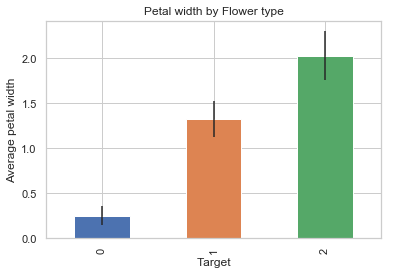

In [83]:
errs = iris_data.groupby("Target")['petal width (cm)'].agg(np.std)
iris_data.groupby("Target")['petal width (cm)'].agg(np.mean).plot(
    yerr = errs, kind = 'bar', title = 'Petal width by Flower type')
sns.mpl.pyplot.ylabel('Average petal width')
sns.mpl.pyplot.savefig('myFig.png')

### Exercise Time!
The only way to learn `matplotlib` and `seaborn` is just practice. Practice makes perfect. Now work in your groups to create these graphs from scratch.
1. The distribution/histogram of 
    * petal width overall
    * petal width grouped by flower type (Target) overlaying each other

2. The scatterplot of 
    * sepal width vs petal length

3. Aggregate bar charts of
    * average sepal length per flower type

4. Choose your own graoph

5. Display 4 graphs in a facet grid